# Keras
- 파이썬으로 작성된 고수준 신경망 API롤 Tensorflow, CNTK 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확정성을 통해 빠르고 간편한 프로토파이핑 가능
- 컨볼류션 신경망, 순환신경망, 그리고 둘의 조합까지 모두 가능
- CPU와 GPU에서 매끄럽게 실행

In [1]:
import numpy as np
import tensorflow as tf

tf.__version__

'2.7.0'

# 레이어들을 import 하는 방식(1)
 - 일일이 import 하지 않아도 됨
 - 코드가 다소 길어질 수 있음

In [3]:
from tensorflow import keras

keras.__version__

'2.7.0'

In [4]:
keras.layers.Dense(10, activation='sigmoid')

In [5]:
keras.Model()

In [6]:
keras.models.Sequential()

# 레이어들을 import하는 방식(2)
- 일일이  import 해야 함
- 코드가 간결

In [7]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [8]:
Dense(10, activation='relu')

In [9]:
Flatten(input_shape=[28,28])

In [10]:
X_train = np.random.randn(5500,2)
Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

#주요 레이어

# Dense
- Fully-Connected Layer
- 노드수(유닛수), 활성화 함수 등을 지정
- name을 통한 레이어간 구분 가능
- 기본적으로
- 'Glorot_uniform'가중치(Xavier 분포 초기화), zero bias로 초기화
-kernel_initializer인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [11]:
dense = Dense(10, activation='relu', name='Dense Layer')

In [12]:
dense

In [13]:
dense2 = Dense(15, activation='softmax')

In [14]:
dense2

# Activation
 - Dense layer에서 미리 활성화함수를 지정할 수도 있지만 때에 따라서 레이어를 만들어줄 수 있음

In [16]:
dense = Dense(10, kernel_initializer='he_normal', name= 'Dense Layer')
dense = Activation(dense)
dense

# Flatten
- 배치크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
 ### (128,3,2,2) ---> (128, 12)

In [18]:
Flatten(input_shape=(28,28))

# Input
- 모델의 입력을 정의
- shape, dtype을 포함
- 하나의 모델은 여러개의 입력을 가질 수 있음
- summary()메소드를 통해서는 보이지 않음

In [19]:
input_1 = Input(shape=(28,28), dtype=tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [20]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [21]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_3')>

# 모델 구성 방법
- Sequential()
- 함수형 API

# Sequential()
- 모델이 순차적으로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후, add를 통한 방법
  - Sequential 인자에 한번에 추가
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [22]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [23]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 구조 확인
 - model 객체의 summary() 이용

In [26]:
model.summary()
# 28 x 30 + 30 = 8700
# 300 x 100 + 100 = 30100
# 100 x 10 + 10 = 1010

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


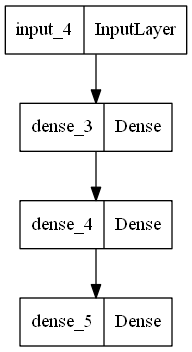

In [28]:
plot_model(model)

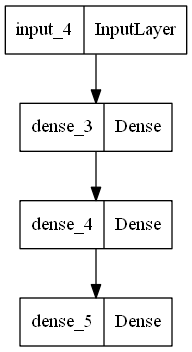

In [29]:
plot_model(model, to_file='model#1.png')

In [1]:
#!ls

In [31]:
model = Sequential([Input(shape=(28,28), name='Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


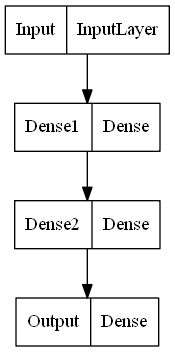

In [33]:
plot_model(model)

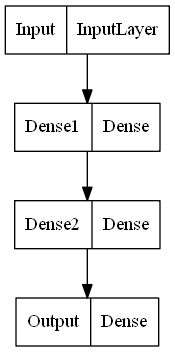

In [34]:
plot_model(model, to_file='model#2.png')

# 함수형 API
- 가장 권장되는 방법
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [38]:
inputs = Input(shape=(28,28, 1))

X = Flatten(input_shape=(28, 28, 1))(inputs)
X = Dense(300, activation='relu')(X)
X = Dense(100, activation='relu')(X)
X = Dense(10, activation='softmax')(X)

In [40]:
model = Model(inputs=inputs, outputs=X)

In [42]:
model.summary()
# 783 x 300 + 300 = 235500

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


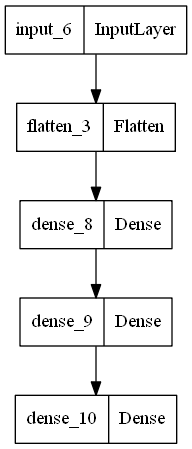

In [43]:
plot_model(model)

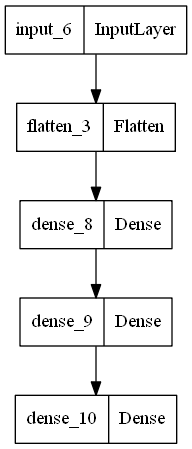

In [44]:
plot_model(model, to_file='model#3.png')

In [48]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model= Model(inputs=[input_layer], outputs=[output])

In [49]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 28, 100)      2900        ['input_7[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 28, 30)       3030        ['dense_11[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_7[0][0]',                
                                                                  'dense_12[0][0]']         

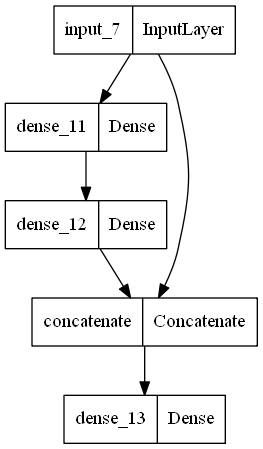

In [50]:
plot_model(model)

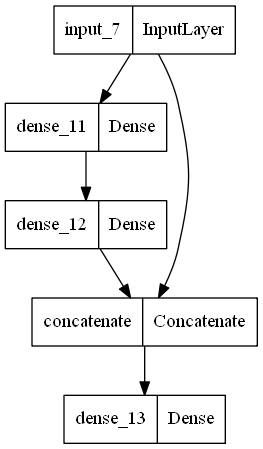

In [51]:
plot_model(model, to_file='model#4.png')

In [55]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])

In [56]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_18 (Dense)               (None, 10, 10)       1010        ['dense_17[0][0]']               
                                                                                            

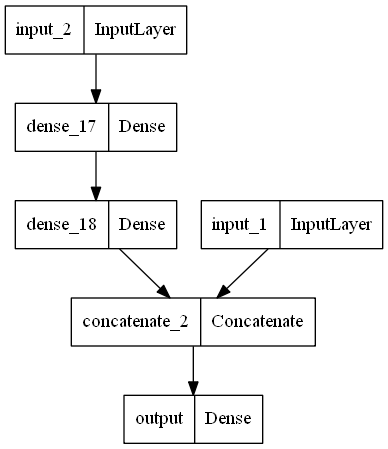

In [57]:
plot_model(model)

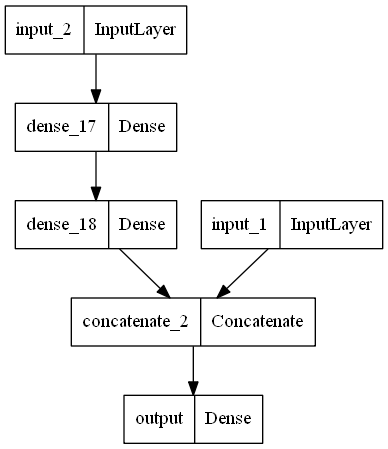

In [58]:
plot_model(model, to_file='model#5.png')

In [59]:
input_ = Input(shape=(10, 10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1 , activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sub_output')(hidden2)

model = Model(inputs=[input_], outputs=[output, sub_out])

In [60]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_20 (Dense)               (None, 10, 10)       1010        ['dense_19[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_20[0][0]']               
                                                                                            

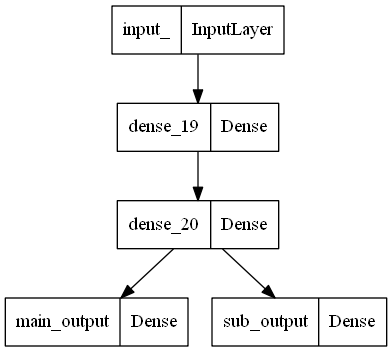

In [61]:
plot_model(model)

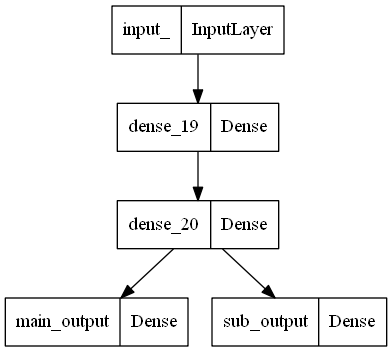

In [62]:
plot_model(model,to_file='model#6.png' )

In [66]:
input_1 = Input(shape=(10, 10), name='input_1')
input_2 = Input(shape=(10, 28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat  = Concatenate()([input_1, hidden2])
output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sub_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs=[output, sub_out])

In [67]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 10, 10)       1010        ['dense_27[0][0]']               
                                                                                            

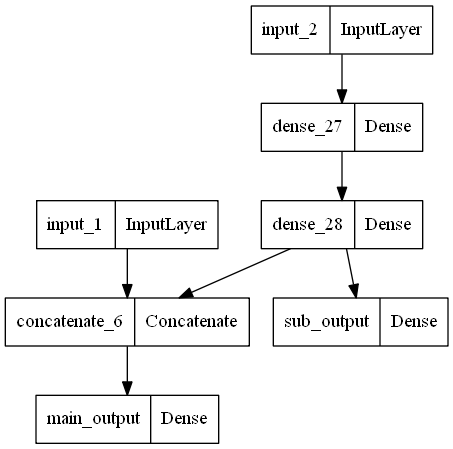

In [68]:
plot_model(model)

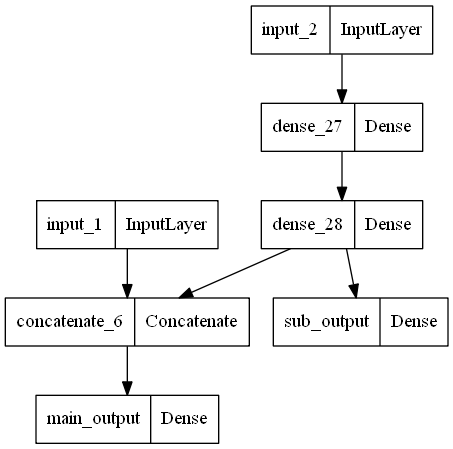

In [69]:
plot_model(model, to_file='model#7.png')